In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")


# Other potential imports depending on your specific needs
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [2]:
data= pd.read_csv("prices-NY+stocks.csv")

In [3]:
data

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [4]:
data.dtypes

date       object
symbol     object
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [6]:
data.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

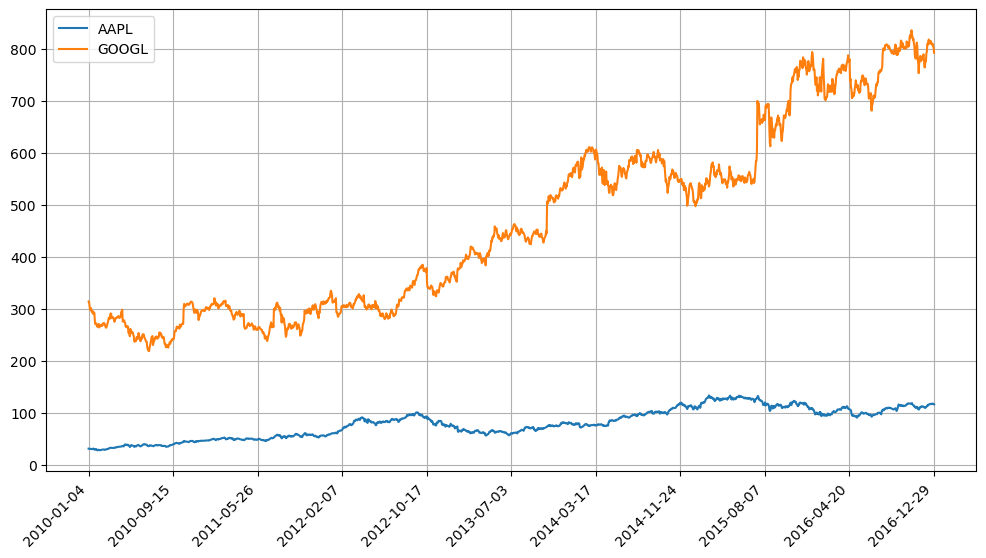

In [7]:
# Filter data for AAPL and GOOGL
aapl_data = data[data['symbol'] == 'AAPL']
googl_data = data[data['symbol'] == 'GOOGL']

# Plotting data
plt.figure(figsize=(12, 6))
plt.plot(aapl_data['date'], aapl_data['close'], label='AAPL')
plt.plot(googl_data['date'], googl_data['close'], label='GOOGL')
plt.legend()
plt.grid(True)

# Set x-axis ticks and labels
plt.xticks(aapl_data['date'][::len(aapl_data)//10], rotation=45, ha='right')

# Show the plot
plt.show()


In [8]:
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values(by='date')
data.set_index('date', inplace=True)

In [9]:
df = data[data['symbol'] == 'AAPL']
df

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,AAPL,30.490000,30.572857,30.340000,30.642857,123432400.0
2010-01-05,AAPL,30.657143,30.625713,30.464285,30.798571,150476200.0
2010-01-06,AAPL,30.625713,30.138571,30.107143,30.747143,138040000.0
2010-01-07,AAPL,30.250000,30.082857,29.864286,30.285715,119282800.0
2010-01-08,AAPL,30.042856,30.282858,29.865715,30.285715,111902700.0
...,...,...,...,...,...,...
2016-12-23,AAPL,115.589996,116.519997,115.589996,116.519997,14249500.0
2016-12-27,AAPL,116.519997,117.260002,116.489998,117.800003,18296900.0
2016-12-28,AAPL,117.519997,116.760002,116.199997,118.019997,20905900.0


In [10]:
df1 = df

In [11]:
X = df1[['open','low','high','volume']]
Y = df1[['close']]

In [12]:
df1 = df.reset_index()['close']
df1

0        30.572857
1        30.625713
2        30.138571
3        30.082857
4        30.282858
           ...    
1757    116.519997
1758    117.260002
1759    116.760002
1760    116.730003
1761    115.820000
Name: close, Length: 1762, dtype: float64

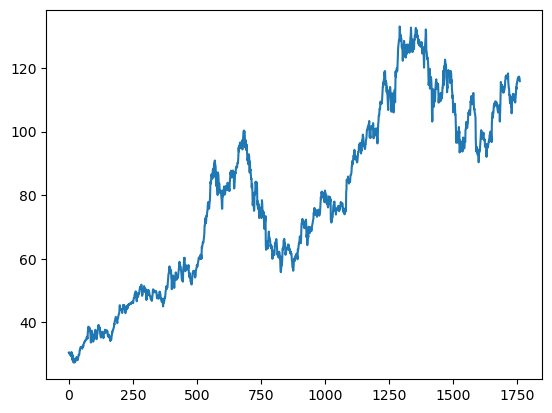

In [13]:
plt.plot(df1)

In [14]:
df1.shape

(1762,)

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.02971784]
 [0.03021854]
 [0.02560389]
 ...
 [0.84616011]
 [0.84587593]
 [0.83725556]]


In [16]:
train_size = int(len(df1)*0.70)
test_size = len(df1) - train_size

In [17]:
train_size,test_size

(1233, 529)

In [18]:
train_data = df1[0:train_size, :]
test_data = df1[train_size:len(df1), :1]


In [19]:
train_data

array([[0.02971784],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84189727],
       [0.84341296],
       [0.86387439]])

In [20]:
test_data

array([[0.85411731],
       [0.86737939],
       [0.86671629],
       [0.83015089],
       [0.82598278],
       [0.83829758],
       [0.83412949],
       [0.82948779],
       [0.80485826],
       [0.82115166],
       [0.80059541],
       [0.79746941],
       [0.77956563],
       [0.76535628],
       [0.75133635],
       [0.77653431],
       [0.80722649],
       [0.79898504],
       [0.80997363],
       [0.80618446],
       [0.80116383],
       [0.81992014],
       [0.81916236],
       [0.80599496],
       [0.78572296],
       [0.77577646],
       [0.7465999 ],
       [0.74669465],
       [0.76080926],
       [0.80002706],
       [0.80116383],
       [0.77501861],
       [0.78420733],
       [0.78022873],
       [0.75199946],
       [0.74413693],
       [0.76999798],
       [0.77786051],
       [0.80485826],
       [0.81035255],
       [0.81148926],
       [0.77397658],
       [0.83242437],
       [0.86643212],
       [0.84994929],
       [0.86387439],
       [0.86406389],
       [0.872

In [21]:
def create_sequences(data, timeStamp=1):
    X, y = [], []
    for i in range(len(data) - timeStamp):
        X.append(data[i:i+timeStamp,0])
        y.append(data[i+timeStamp,0])
    return np.array(X), np.array(y)

In [22]:
time_step = 5

X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

In [23]:
X_train.shape, y_train.shape

((1228, 5), (1228,))

In [24]:
X_test.shape, y_test.shape

((524, 5), (524,))

In [25]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (5,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 5, 50)             20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 50, batch_size = 64)

Epoch 1/50

20/20 [==============================] - 7s 65ms/step - loss: 0.0802 - val_loss: 0.0089
Epoch 2/50
20/20 [==============================] - 0s 10ms/step - loss: 0.0178 - val_loss: 0.0180
Epoch 3/50
20/20 [==============================] - 0s 11ms/step - loss: 0.0048 - val_loss: 0.0070
Epoch 4/50
20/20 [==============================] - 0s 10ms/step - loss: 7.9690e-04 - val_loss: 0.0077
Epoch 5/50
20/20 [==============================] - 0s 10ms/step - loss: 6.4033e-04 - val_loss: 0.0043
Epoch 6/50
20/20 [==============================] - 0s 9ms/step - loss: 5.6209e-04 - val_loss: 0.0033
Epoch 7/50
20/20 [==============================] - 0s 10ms/step - loss: 5.0897e-04 - val_loss: 0.0028
Epoch 8/50
20/20 [==============================] - 0s 11ms/step - loss: 4.8297e-04 - val_loss: 0.0024
Epoch 9/50
20/20 [==============================] - 0s 10ms/step - loss: 4.4369e-04 - val_loss: 0.0017
Epoch 10/50
20/20 [==============================] - 0s 10ms/step - loss: 4.2145e-04 

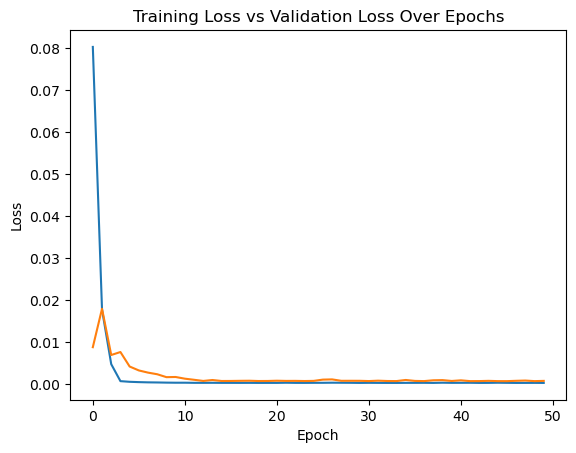

In [28]:
# Access the training loss from the history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot the training loss over epochs
plt.plot(training_loss)
plt.plot(validation_loss)
plt.title('Training Loss vs Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [29]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

17/17 [==============================] - 0s 4ms/step


In [30]:
# Assuming X_test and y_test are your test data
# Replace this with your actual test data
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
# Print the test loss (MSE in this case)
print(f'Test Loss (MSE): {test_loss}')


17/17 [==============================] - 0s 3ms/step
Test Loss (MSE): 0.0008555935346521437


In [31]:
for i in range(10):
    print(y_pred[i], y_test[i])

[0.863935] 0.8382975837538083
[0.86104524] 0.83412948846657
[0.85128886] 0.8294877860321352
[0.8395373] 0.8048582629603562
[0.8388576] 0.8211516617679642
[0.83876127] 0.8005954102466557
[0.8320933] 0.7974694098279829
[0.8243461] 0.7795656273613571
[0.81505996] 0.7653562761973685
[0.8113675] 0.7513363546301972


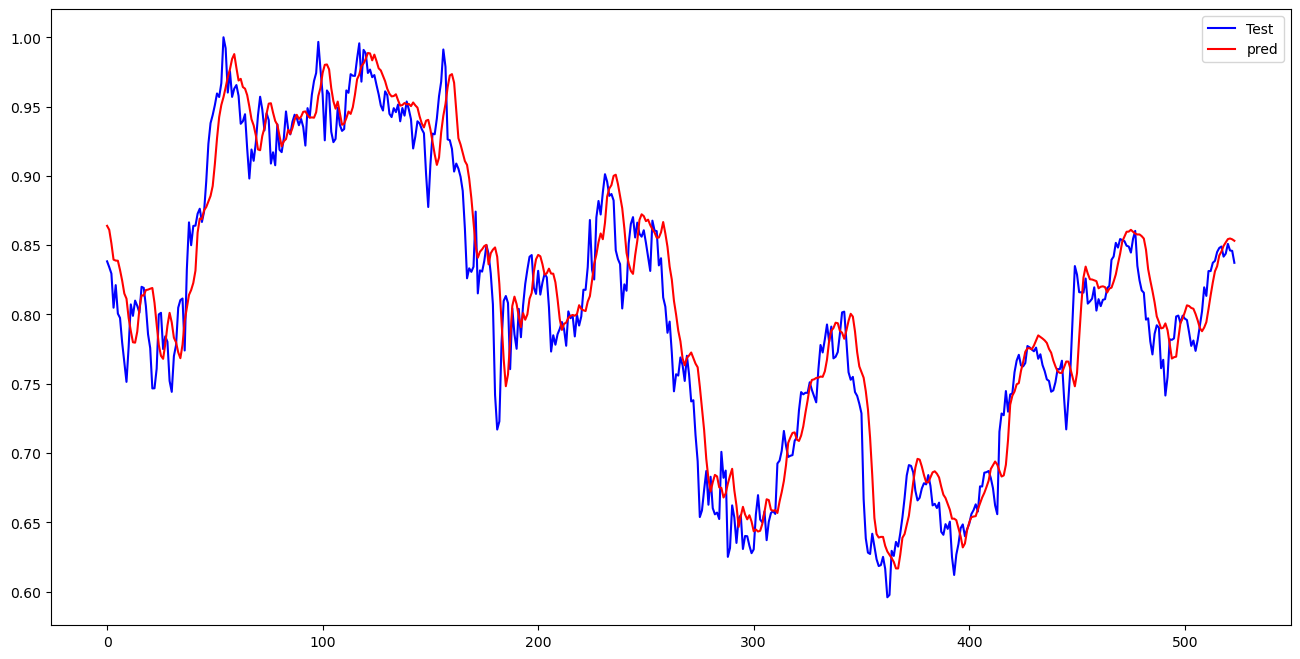

In [32]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = "blue", label = 'Test')
plt.plot(y_pred, color = "red", label = 'pred')
plt.legend()
plt.show()